In [1]:
from features.explainability.monkey_patching import patch_shap
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Some tensorflow warnings in the pipeline we inspect
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector
from mlinspect.inspections import MaterializeFirstOutputRows

EXAMPLE_PIPELINE = os.path.join(str(get_project_root()), "features", "explainability", "example_pipeline.py")

inspector_result = PipelineInspector\
    .on_pipeline_from_py_file(EXAMPLE_PIPELINE) \
    .add_custom_monkey_patching_module(patch_shap) \
    .execute()

extracted_dag = inspector_result.dag
dag_node_to_inspection_results = inspector_result.dag_node_to_inspection_results
check_results = inspector_result.check_to_check_results

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Using 217 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Mean accuracy: 0.8904109589041096
Predict first 10 samples: [False  True False False False  True False  True False False]
PLEASSEEEEEEEE!


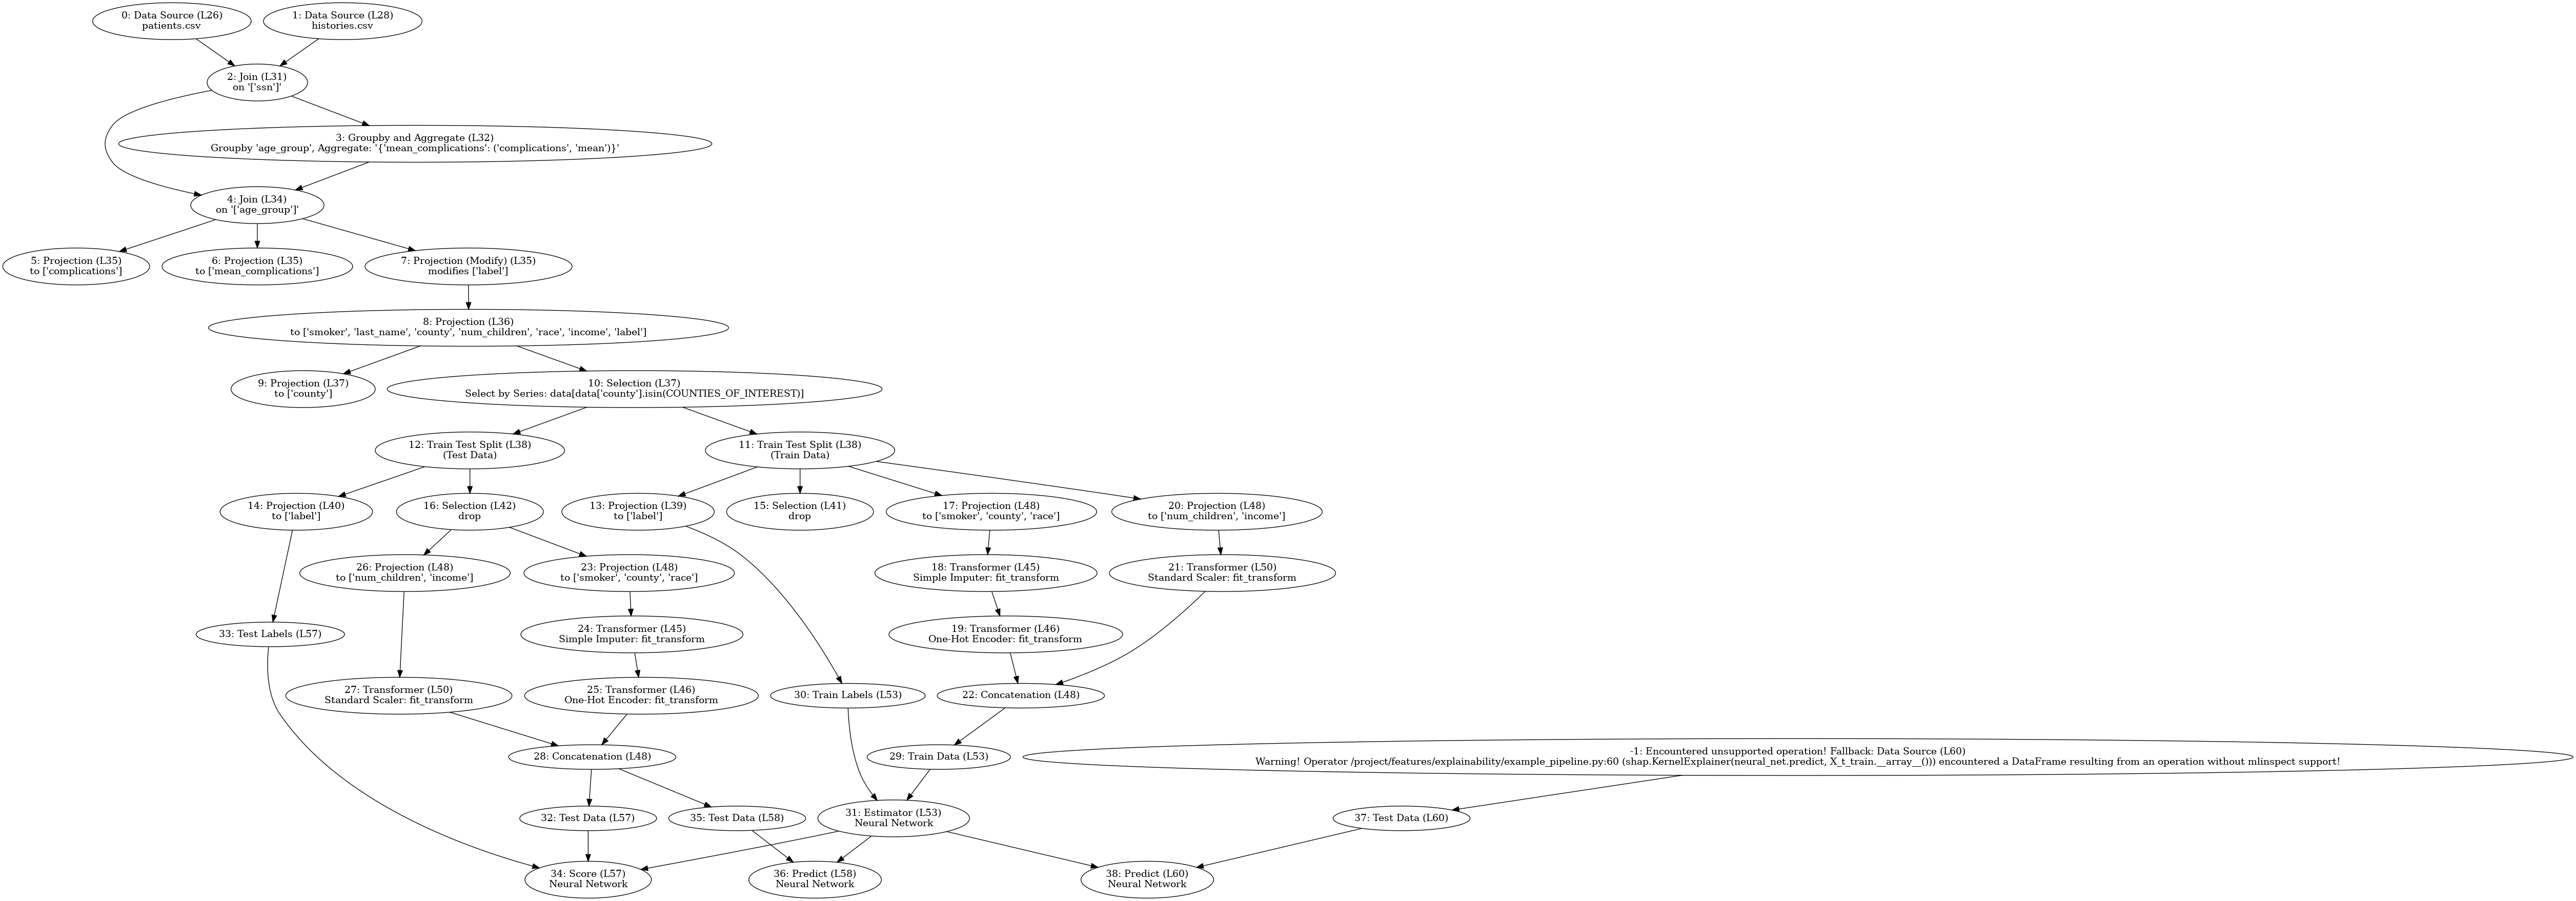

In [2]:
from IPython.display import Image
from mlinspect.visualisation import save_fig_to_path

filename = os.path.join(str(get_project_root()), "features", "explainability", "explainability.png")
save_fig_to_path(extracted_dag, filename)

Image(filename=filename)